## Análise de incêndios florestais no Brasil

##### Incêndios floretais vem se tornando cada vez mais grave em nosso país. Analisando e compreendendo a frêquencia em uma série temporal nos ajudará a levantar medidas necessárias para evitar o pior, afinal, o brasil é o país com a maior floresta tropical do planeta: A floresta amazônica.

made by: micaella izel, from july 21 to july 23

# Base de Dados

In [10]:
#libs para Modelagem e Matrizes

import numpy as np
import pandas as pd

#lbs para análise gráfica

import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [3]:
# leitura dos dados
df = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')

#Verificar
df.head()

year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01

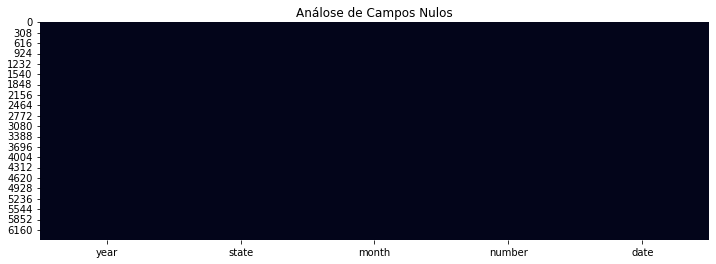

In [4]:
#Nulos Plot

plt.figure( figsize=(12,4) )
plt.title('Análose de Campos Nulos')
sns.heatmap( df.isnull(), cbar=False );

In [5]:
# STATISTICS

df.describe()

year       number
count  6454.000000  6454.000000
mean   2007.461729   108.293163
std       5.746654   190.812242
min    1998.000000     0.000000
25%    2002.000000     3.000000
50%    2007.000000    24.000000
75%    2012.000000   113.000000
max    2017.000000   998.000000

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [7]:
#Campos únicos

df.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

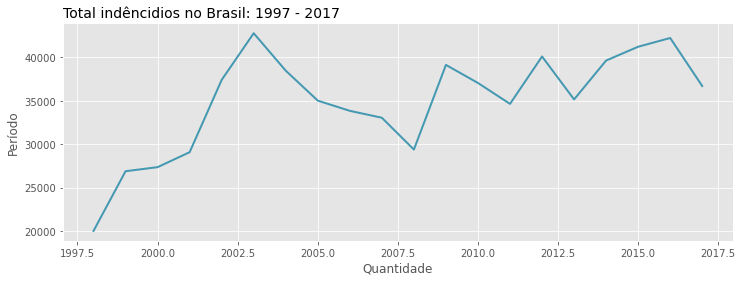

In [14]:
# analise por ano dos incendios
Analise01 = df.groupby( by=['year'] ).sum().reset_index()

Analise01.head()

# Tamanho
plt.figure( figsize=(12, 4) )

# Style
plt.style.use('ggplot')

# Grafico
plt.title('Total indêncidios no Brasil: 1997 - 2017', loc='left', fontsize=14)
sns.lineplot( data=Analise01, x='year', y='number', estimator='sum', lw=2, color='#288BA8', alpha=0.85 );

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');

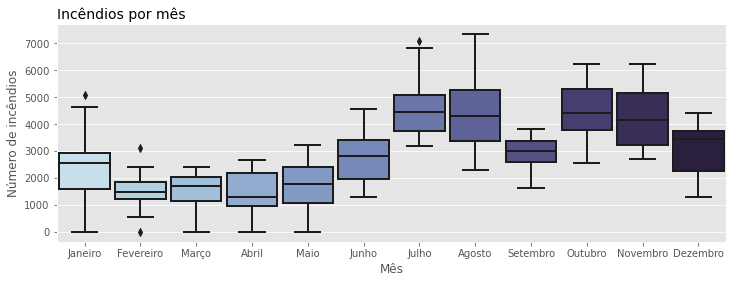

In [17]:
# analise por mês dos incendios
Analise02 = df.groupby( by=['year', 'month'] ).sum().reset_index()
Analise02.head()

# Weight
plt.figure( figsize=(12, 4) )

# Graph
plt.title( 'Incêndios por mês', loc='left', fontsize=14 )
sns.boxplot( data=Analise02, x='month', y='number', palette='ch:s=.25,rot=-.25', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )

# Labels
plt.xlabel('Mês')
plt.ylabel('Número de incêndios');

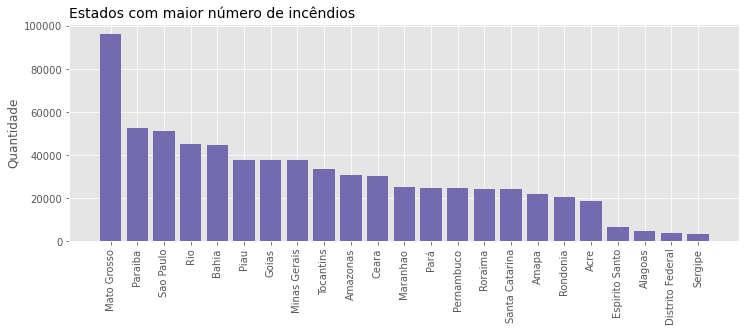

In [20]:
# analise por ano dos incendios
Analise03 = df.groupby( by=['state'] ).sum().reset_index()[['state', 'number']].sort_values( 'number', ascending=False )
Analise03.head()

# Tamanho
plt.figure( figsize=(12, 4) )

# Graph
plt.title( 'Estados com maior número de incêndios', loc='left', fontsize=14 )

# Graph
plt.bar( Analise03.state, Analise03['number'], color='#746AB0' )

# Labels
plt.ylabel('Quantidade')
plt.xticks( rotation=90);

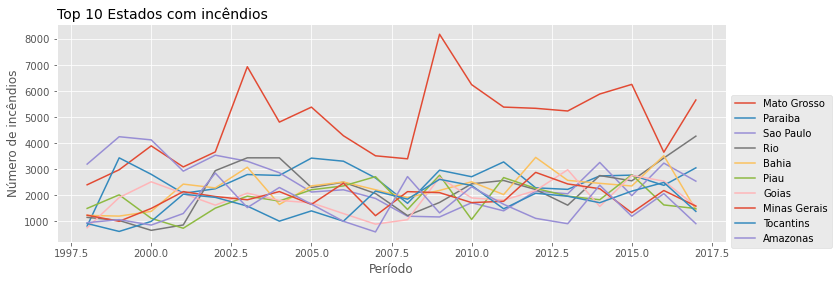

In [32]:
Lista_TOP10 = Analise03['state'][0:10].values

# Tamanho
plt.figure( figsize=(12, 4) )

# Graph
plt.title( 'Top 10 Estados com incêndios', loc='left', fontsize=14 )

#Loop
for Coluna in Lista_TOP10:
    
    # filtrar o estado
    Filtro = df.loc[df['state'] == Coluna ]
    
    #Agrupar os valores para sumarizar
    Analise_Local = Filtro.groupby( by=['year'] ).sum().reset_index()
    
    #graph
    sns.lineplot(data=Analise_Local, x='year', y='number')
    
    # Labels
plt.xlabel('Período')
plt.ylabel('Número de incêndios');
    
#Legenda

plt.legend(Lista_TOP10, bbox_to_anchor=(1, 0.7) );

In [33]:
#Plot Geográfico

#Gerando os estados
Estados = Analise03.sort_values('state')['state'].values

#Gerando os valores
Valores = Analise03.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

#Organizando os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

#Lendo o dicionario
Analise_Geografica = pd.DataFrame (Dicionario)

Analise_Geografica.head()

Estados  Latitude  Longitude  Incêndios
0      Acre     -8.77     -70.55  18464.030
1   Alagoas     -9.71     -35.73   4644.000
2     Amapa      1.41     -51.77  21831.576
3  Amazonas     -3.07     -61.66  30650.129
4     Bahia    -12.96     -38.51  44746.226

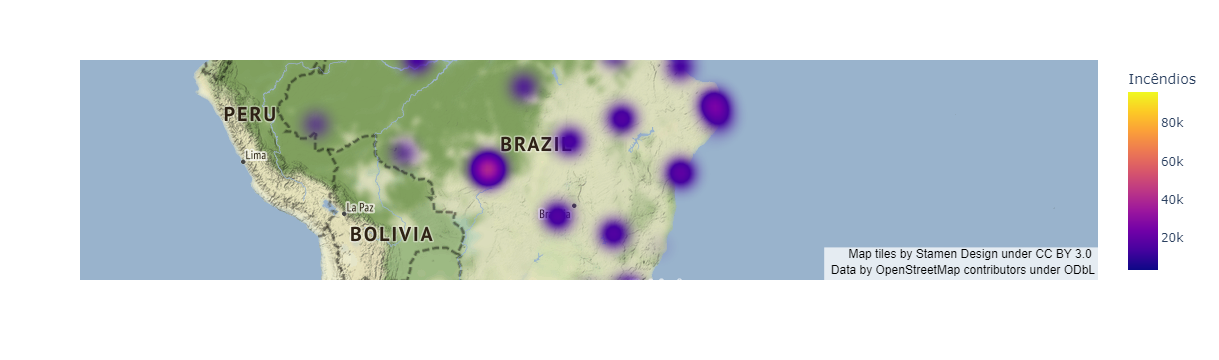

In [39]:
# Fazendo o plot
import plotly.express as px

# Mapa de Calor Geografico
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)

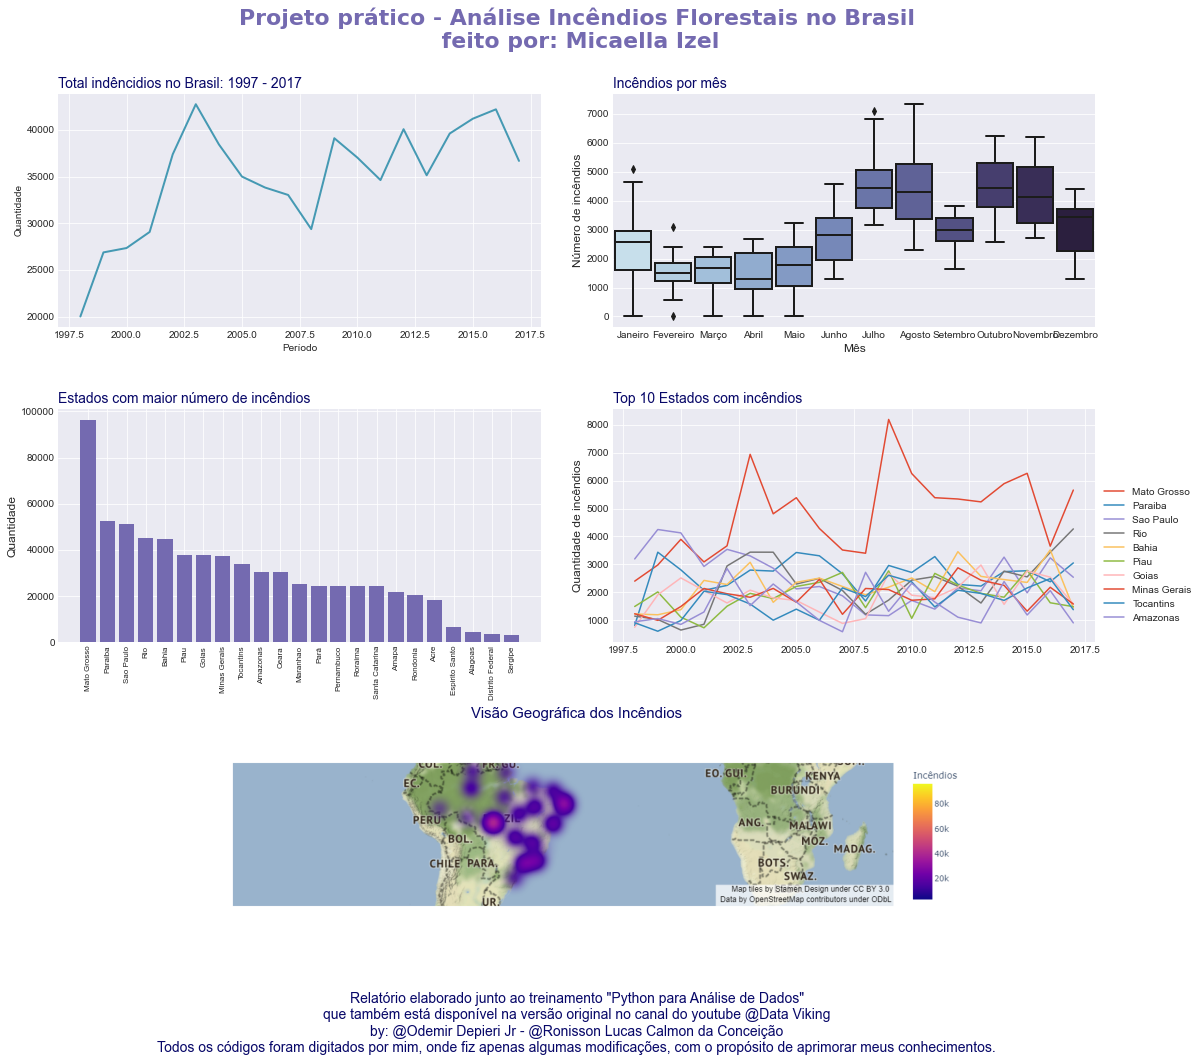

In [81]:
#Import map
import matplotlib.image as mpimg

#initialize figure
fig = plt.figure(figsize=(18, 15)) 

# list to save many ax for setting parameter in each
ax = [ None for _ in range(6) ]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=2)
plt.style.use('seaborn-darkgrid')


# Titulo
plt.title('Total indêncidios no Brasil: 1997 - 2017', loc='left', fontsize=14, color='#070768' )
#Graph
sns.lineplot( data=Analise01, x='year', y='number', estimator='sum', lw=2, color='#288BA8', alpha=0.85 );

# Labels
plt.xlabel('Período', fontsize=10)
plt.ylabel('Quantidade', fontsize=10);

ax[1] = plt.subplot2grid((3,4), (0,2), colspan=2)
# Estilo
#Titulo
plt.title( 'Incêndios por mês', loc='left', fontsize=14, color='#070768' )
#Graph
sns.boxplot( data=Analise02, x='month', y='number', palette='ch:s=.25,rot=-.25', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )

# Labels
plt.xlabel('Mês')
plt.ylabel('Número de incêndios');

ax[2] = plt.subplot2grid((3,4), (1,0), colspan=2)
# Graph Title
plt.title( 'Estados com maior número de incêndios', loc='left', fontsize=14, color='#070768' )
# Graph
plt.bar( Analise03.state, Analise03['number'], color='#746AB0' )
#Labels
plt.ylabel('Quantidade')
plt.xticks( rotation=90, fontsize=8 );

ax[3] = plt.subplot2grid((3,4), (1,2), colspan=2)
#Estilo
plt.style.use('seaborn-darkgrid')
#Paleta de cores
Paleta_Cores= sns.color_palette('inferno', 12)
#Title
plt.title( 'Top 10 Estados com incêndios', loc='left', fontsize=14, color='#070768' )
#Plot de todas as colunas
for Coluna in Lista_TOP10:
    
    # filtrar o estado
    Filtro = df.loc[df['state'] == Coluna ]
    
    #Agrupar os valores para sumarizar
    Analise_Local = Filtro.groupby( by=['year'] ).sum().reset_index()
    
    #graph
    sns.lineplot(data=Analise_Local, x='year', y='number')
    
    # Labels
plt.xlabel(' ')
plt.ylabel('Quantidade de incêndios');

#Legenda
plt.legend(Lista_TOP10, bbox_to_anchor=(1, 0.7) );

ax[4] = plt.subplot2grid((3,4), (2,0), colspan=4)
Buraco_Negro = mpimg.imread('newplot (1).png')
plt.imshow(Buraco_Negro)
plt.axis('off')
plt.title('Visão Geográfica dos Incêndios', loc='center', fontsize=15, fontweight=2, color='#070768' )

fig.tight_layout()


#Incluindo o Titulo ao dash

plt.suptitle(f'Projeto prático - Análise Incêndios Florestais no Brasil\n feito por: Micaella Izel', fontsize=22, color='#746AB0', fontfamily='KyivType Sans', fontweight=600 )
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.35, hspace=0.35)

#Rodapé
Rodape = '''
Relatório elaborado junto ao treinamento "Python para Análise de Dados"
que também está disponível na versão original no canal do youtube @Data Viking
by: @Odemir Depieri Jr - @Ronisson Lucas Calmon da Conceição
Todos os códigos foram digitados por mim, onde fiz apenas algumas modificações, com o propósito de aprimorar meus conhecimentos.'''''

#Incluindo o rodape no relatorio
fig.text( 0.5, 0.01, Rodape, ha='center', va='bottom', size=14, color='#070768');

plt.show()